<a href="https://colab.research.google.com/github/Nadia269/ML_project-/blob/main/Medical_Insurance_Cost_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


Data collection & Analysis

In [2]:
#Load the Dataset:
insurance_data=pd.read_csv('/content/insurance.csv')

In [3]:
#Check the first few rows of the dataset.
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape


(1338, 7)

In [5]:
insurance_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

 Categorical features :



1.  sex
2. smoker
3. region



In [6]:
print(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
print(insurance_data.notnull().sum())

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


Data Analysis


In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

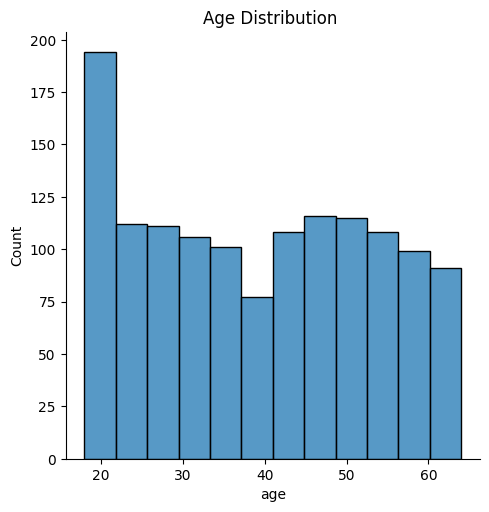

In [9]:
# distribution of age value
# sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.title('Age Distribution ')
plt.show()


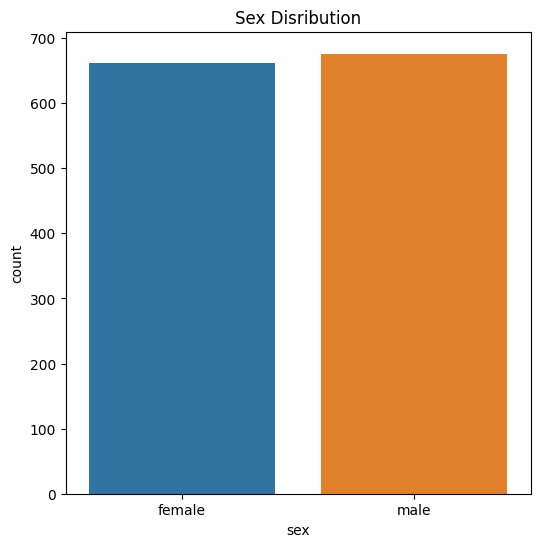

In [10]:
 #Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Disribution')
plt.show()

In [11]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

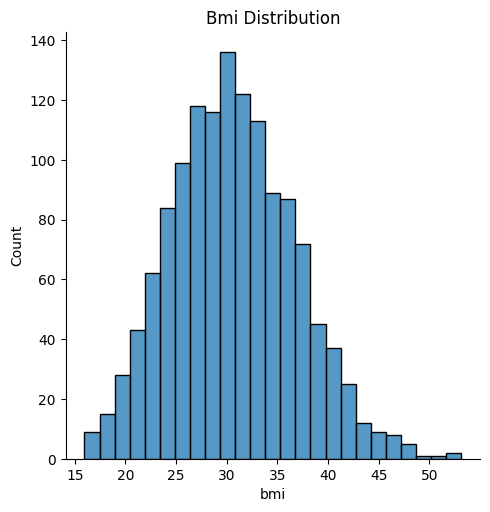

In [12]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.title('Bmi Distribution')
plt.show()




Normal Range 18.5....24.9

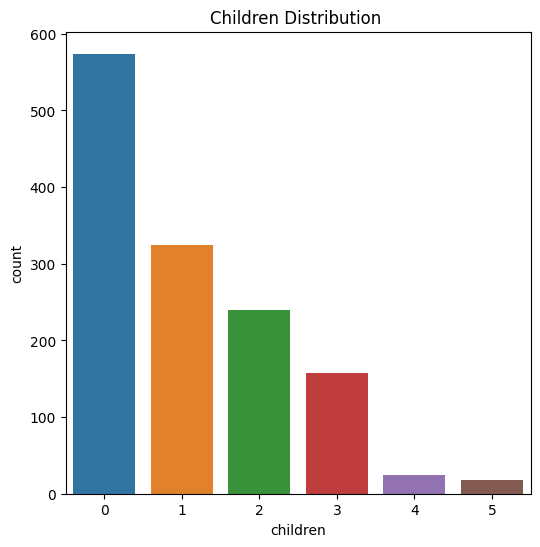

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
# sns.displot(insurance_data['children'])
plt.title('Children Distribution ')
plt.show()

In [14]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

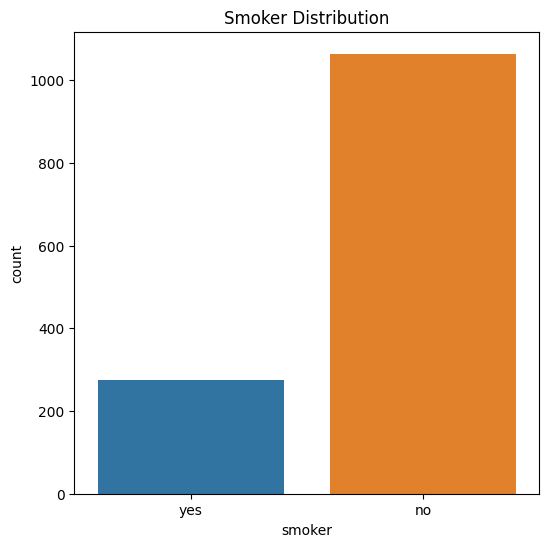

In [15]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker Distribution')
plt.show()

In [16]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

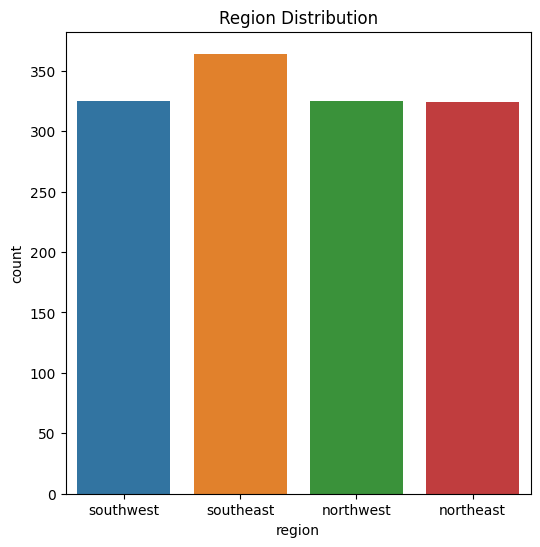

In [17]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

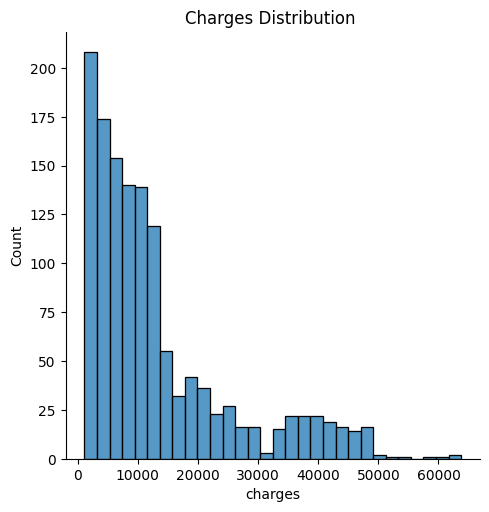

In [18]:
# charges column
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.title('Charges Distribution ')
plt.show()

In [19]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
# HEREEEEEEEEEEEEEEE 1
#Examine the data types of each column.

print(insurance_data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [21]:
# calculate mean hereeeeeee 2
print(insurance_data.mean())

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64


<ipython-input-21-76995457d2a4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(insurance_data.mean())


In [22]:
# calculate median hereeeeeeee 3
print(insurance_data.median())

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


<ipython-input-22-3287c5f06844>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(insurance_data.median())


In [23]:
# calculate max hereeeeee 4
print(insurance_data.max())

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object


In [24]:
#calculate min hereeeeee 5
print(insurance_data.min())

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object


data pre_processing

Encoding categorial features


In [25]:
# encoding sex
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding smoker
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# ecoding region
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
print(insurance_data)


      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


*Splitting* the features and Target




In [26]:
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']

In [27]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(Y)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting data on Tranning set and test set


In [29]:
#train_test_split
X_train ,X_test ,Y_train ,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)


In [30]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [31]:
# loading linear model
regressor=LinearRegression()

In [32]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation


In [33]:
# Predicting on traning data
training_data_prediction=regressor.predict(X_train)

In [34]:
# R_ squared value
r2_train=metrics.r2_score(training_data_prediction,Y_train)
print('R Squared Value :',r2_train)


R Squared Value : 0.6693380032904606


In [35]:
# predicting on test data
test_data_prediction=regressor.predict(X_test)

In [36]:
# R Squared value
r2_test =metrics.r2_score(test_data_prediction,Y_test)
print('R Squared Value :',r2_test)

R Squared Value : 0.6606659986058923


finally Predective system


In [37]:
input_data=(31,1,25.74,0,1,0)
# changing input data to numby array
input_data_as_numby_array=np.asarray(input_data)
# reshape the array
input_data_reshaped=input_data_as_numby_array.reshape(1,-1)

# prediction
prediction =regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ' ,prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


KNN Regressior


In [38]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


*Splitting* the features and Target


In [39]:
X=insurance_data[['age','region','smoker','bmi','sex','children']]
Y=insurance_data['charges']

Splitting

In [40]:
X_train ,X_test ,Y_train ,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)


In [41]:
 # Standardize your features (important for KNN)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
from math import sqrt


**Final** **version** **KNN** **Regressor**

Find a reasonable value for k


In [43]:
# calculte K by calculates the number of samples in the training set
 # then square root  it
k_value = int(sqrt(len(X_train)))
print(k_value)

32


In [44]:
# Store RMSE= ROOT Mean square error values for different k
rmse_values=[]

In [45]:
# final version
# Try different k values and evaluate their performance
for k in range(1, k_value + 1):  # (1,32)

    # Create a KNN model with the current k value
    knn = KNeighborsRegressor(n_neighbors=k)

    # Perform cross-validation to get a more robust estimate
    scores=cross_val_score(knn,X_train_scaled,Y_train,cv=5,scoring='neg_mean_squared_error')

     # Calculate and store RMSE
    rmse=sqrt(-scores.mean())
    rmse_values.append(rmse)
    # print the result for each k
    print('RMSE value for k=',k ,'is:',rmse)


RMSE value for k= 1 is: 6657.457023001403
RMSE value for k= 2 is: 5754.626289955937
RMSE value for k= 3 is: 5512.408864296902
RMSE value for k= 4 is: 5388.281980145013
RMSE value for k= 5 is: 5346.673664516487
RMSE value for k= 6 is: 5325.016806265275
RMSE value for k= 7 is: 5290.9998724274365
RMSE value for k= 8 is: 5268.693278561807
RMSE value for k= 9 is: 5262.253100504169
RMSE value for k= 10 is: 5280.3238951788
RMSE value for k= 11 is: 5266.968272821496
RMSE value for k= 12 is: 5300.994449859258
RMSE value for k= 13 is: 5307.495864818422
RMSE value for k= 14 is: 5326.264380815191
RMSE value for k= 15 is: 5332.6032846268345
RMSE value for k= 16 is: 5363.210088888944
RMSE value for k= 17 is: 5377.837287844805
RMSE value for k= 18 is: 5384.910286897091
RMSE value for k= 19 is: 5387.7077389649185
RMSE value for k= 20 is: 5400.719329576065
RMSE value for k= 21 is: 5398.158101503948
RMSE value for k= 22 is: 5411.864138978989
RMSE value for k= 23 is: 5439.259204063368
RMSE value for k= 2

In [46]:
# final version
# Find Minimum RMSE
best_k=rmse_values.index(min(rmse_values))+1
rmse_min= min(rmse_values)
print('the best K is =',best_k,' With a minimum RMSE of =',rmse_min)

the best K is = 9  With a minimum RMSE of = 5262.253100504169


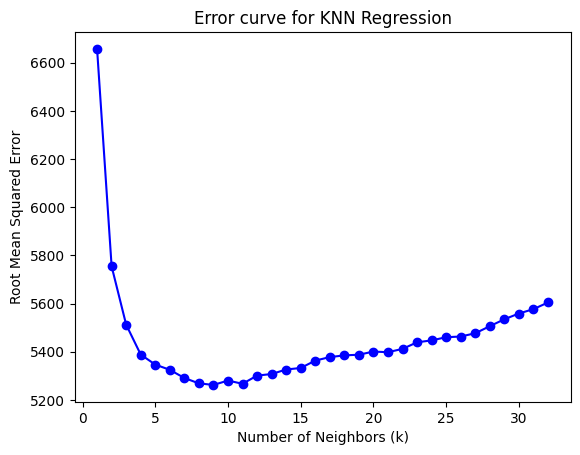

In [47]:
# final version
# Plot the Error Curve
plt.plot(range(1, k_value + 1), rmse_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.title('Error curve for KNN Regression')
plt.show()


In [48]:
# final version
# Create a final KNN model with the best k value
final_knn=KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train_scaled,Y_train)

KNeighborsRegressor(n_neighbors=9)

In [49]:
# final version
# Make predictions on the Train  data
Prediction_Training_Data=final_knn.predict(X_train_scaled)

# R-squared on train data
r2_train=r2_score(Prediction_Training_Data,Y_train)
print('R Squared on Train data =',r2_train)



R Squared on Train data = 0.8187525607186243


In [50]:
# final version
# Make predictions on the test data
Y_test_pred=final_knn.predict(X_test_scaled)

# R-squared on test data
r2_test=r2_score(Y_test_pred,Y_test)
print('R squared on Test data =',r2_test)


R squared on Test data = 0.7675351764760497


In [51]:
# final version
# Mean Squared Error on test data
mse_test=mean_squared_error(Y_test_pred,Y_test)
print('Mean Squared Error on Test Data=',mse_test)

Mean Squared Error on Test Data= 27839082.124536395


In [52]:
# Prediction on new data
new_data=np.array([[31,1,25.74,0,1,0]])
new_data_scaled=scaler.transform(new_data)
new_prediction=final_knn.predict(new_data_scaled)
print('Prediction on new data =',new_prediction)



Prediction on new data = [3113.23457222]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[link text](https://)